In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Configurar estilo de Mercado Libre
sns.set_theme(style="whitegrid", palette="pastel")
yellow_ml = "#ffe600"


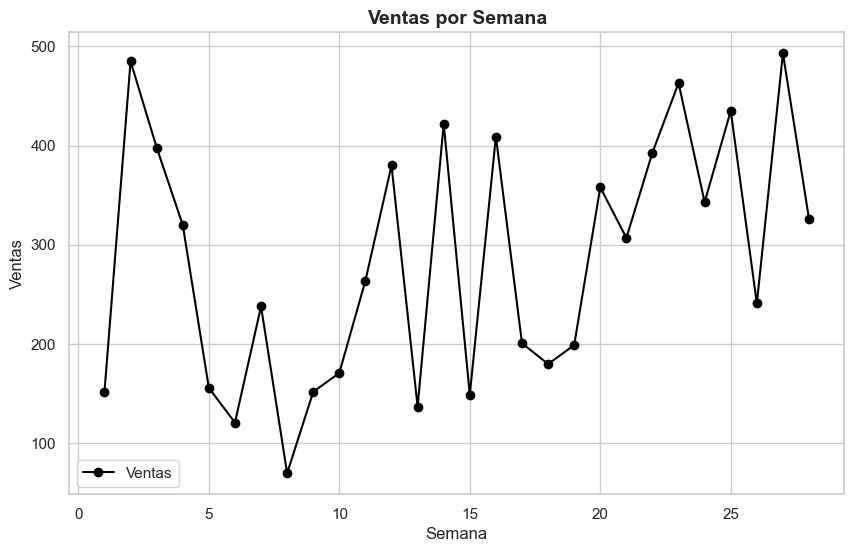

In [18]:
# Cargar los datos
file_path = r"C:\Users\rache\OneDrive\Documentos\MeLi\ML_challenge\DS_challenge\forecasting.txt"
df = pd.read_csv(file_path, delimiter='|')

# Gráfico 1: Ventas por Semana (en negro)
plt.figure(figsize=(10, 6))
plt.plot(df['Week'], df['Sales'], marker='o', color="black", label='Ventas')  # Cambié a color negro
plt.title('Ventas por Semana', fontsize=14, weight='bold')
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


C:\Users\rache\AppData\Local\Temp\ipykernel_18568\397245997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promotion', y='Sales', data=df, palette=[yellow_ml, 'lightgray'])


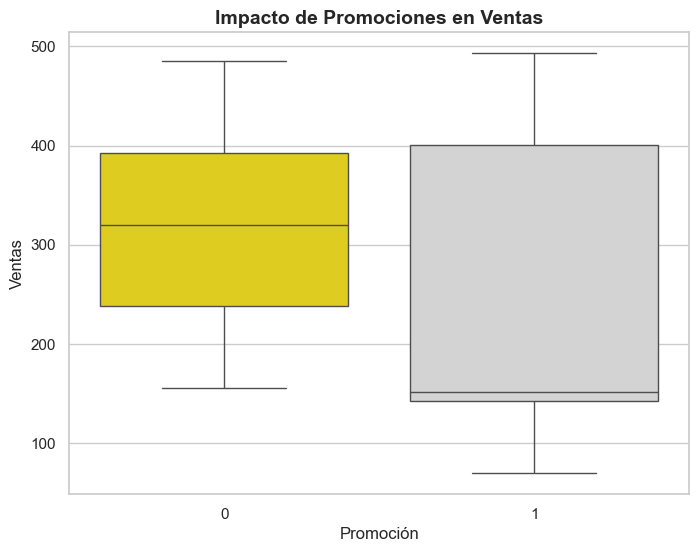

In [5]:
# Gráfico 2: Impacto de Promociones
plt.figure(figsize=(8, 6))
sns.boxplot(x='Promotion', y='Sales', data=df, palette=[yellow_ml, 'lightgray'])
plt.title('Impacto de Promociones en Ventas', fontsize=14, weight='bold')
plt.xlabel('Promoción', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.show()


C:\Users\rache\AppData\Local\Temp\ipykernel_18568\133243781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday', y='Sales', data=df, palette=[yellow_ml, 'lightgray'])


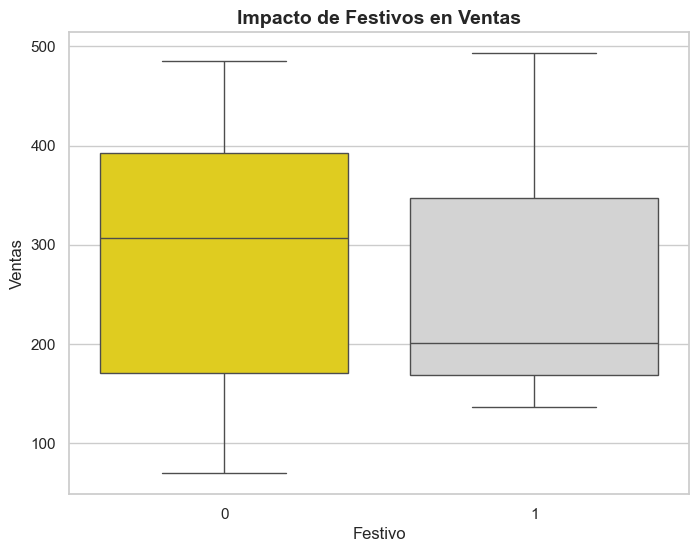

In [6]:
# Impacto de Festivos
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday', y='Sales', data=df, palette=[yellow_ml, 'lightgray'])
plt.title('Impacto de Festivos en Ventas', fontsize=14, weight='bold')
plt.xlabel('Festivo', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.show()

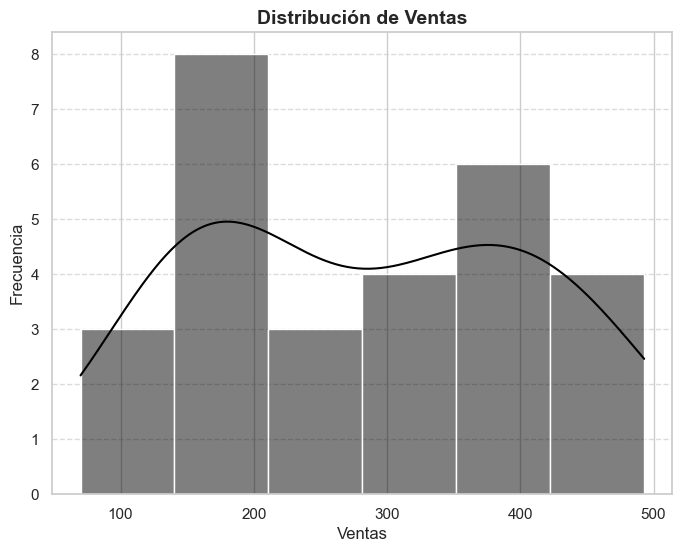

In [17]:
# Gráfico 6: Distribución de Ventas (Barras negras y línea amarilla)
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True, color="black", line_kws={"color": yellow_ml})
plt.title('Distribución de Ventas', fontsize=14, weight='bold')
plt.xlabel('Ventas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


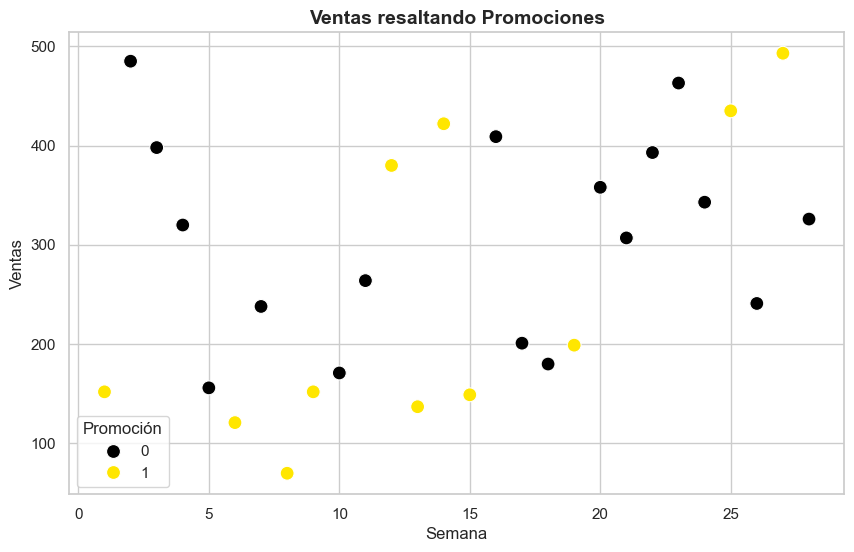

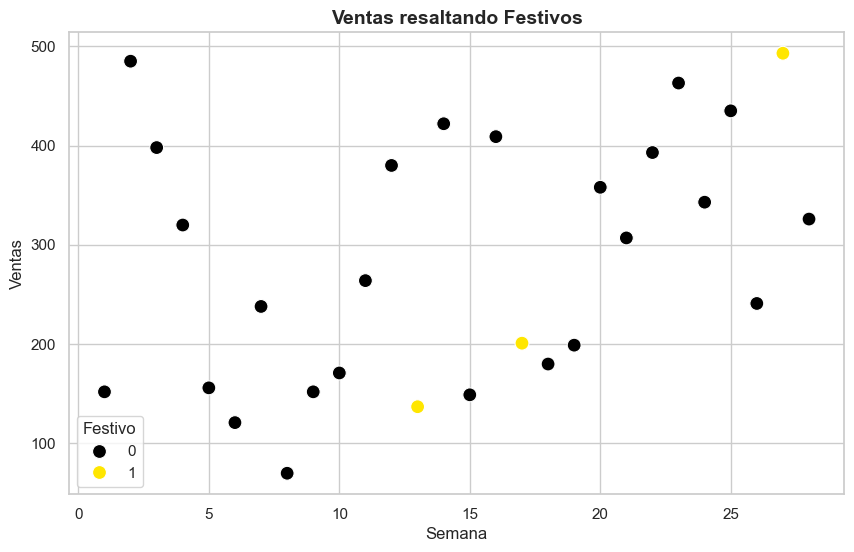

In [29]:
# Load the dataset
file_path = r"C:\Users\rache\OneDrive\Documentos\MeLi\ML_challenge\DS_challenge\forecasting.txt"
df = pd.read_csv(file_path, delimiter='|')

df = df[df['Week'] < 29]

# Fill missing sales with 0 for visualization purposes
df['Sales'] = df['Sales'].fillna(0)

# Add combined columns
df['Promo_Holiday'] = df['Promotion'] + df['Holiday']

# Define color palette for visualizations
yellow_ml = "#ffe600"
black = "#000000"

# 2. Ventas resaltando promociones y festivos (1 = Amarillo, 0 = Negro)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Week', y='Sales', hue='Promotion', palette={0: black, 1: yellow_ml}, s=100)
plt.title('Ventas resaltando Promociones', fontsize=14, weight='bold')
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.grid(True)
plt.legend(title='Promoción')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Week', y='Sales', hue='Holiday', palette={0: black, 1: yellow_ml}, s=100)
plt.title('Ventas resaltando Festivos', fontsize=14, weight='bold')
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.grid(True)
plt.legend(title='Festivo')
plt.show()


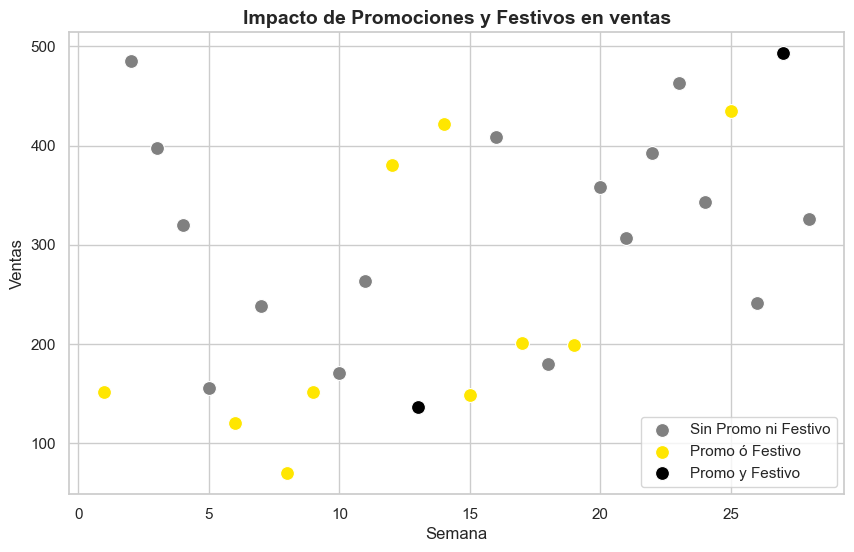

In [30]:
# 4. Dispersión por Categorías de Promo_Holiday
plt.figure(figsize=(10, 6))

# Categoría 0: Sin promoción ni festivo
sns.scatterplot(
    data=df[df['Promo_Holiday'] == 0], 
    x='Week', y='Sales', color="gray", label='Sin Promo ni Festivo', s=100
)

# Categoría 1: Promoción o festivo
sns.scatterplot(
    data=df[df['Promo_Holiday'] == 1], 
    x='Week', y='Sales', color=yellow_ml, label='Promo ó Festivo', s=100
)

# Categoría 2: Promoción y festivo
sns.scatterplot(
    data=df[df['Promo_Holiday'] == 2], 
    x='Week', y='Sales', color="black", label='Promo y Festivo', s=100
)

plt.title('Impacto de Promociones y Festivos en ventas', fontsize=14, weight='bold')
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

ADF Statistic: -2.131501209661944
p-value: 0.23203787000957565
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625
Máximo número permitido de lags: 15


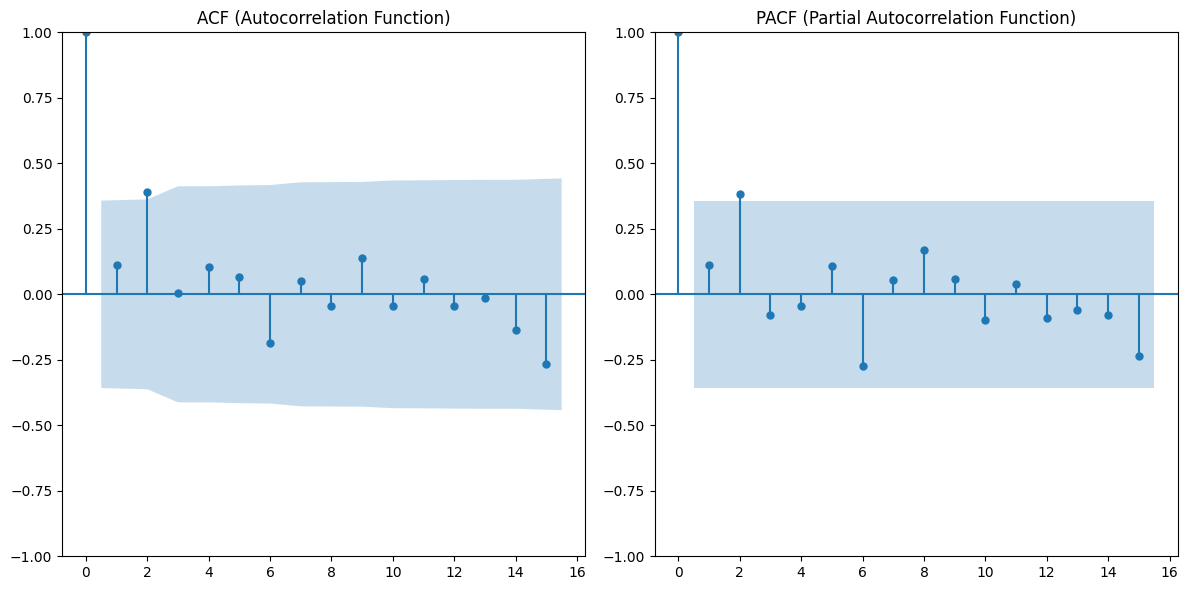

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar datos
data = {
    'Week': list(range(1, 31)),
    'Sales': [152, 485, 398, 320, 156, 121, 238, 70, 152, 171, 264, 380, 137, 422, 149, 409, 201, 180, 199, 358,
              307, 393, 463, 343, 435, 241, 493, 326, None, None]
}
df = pd.DataFrame(data)

# Reemplazar valores nulos en Sales con interpolación
df['Sales'] = df['Sales'].interpolate(method='linear')

# Test de Dickey-Fuller Aumentado (ADF Test)
result = adfuller(df['Sales'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

# Calcular el número máximo de lags permitido
max_lags = len(df['Sales'].dropna()) // 2  # 50% del tamaño de la serie
print(f"Máximo número permitido de lags: {max_lags}")

# Graficar ACF y PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['Sales'].dropna(), lags=max_lags, ax=plt.gca())
plt.title("ACF (Autocorrelation Function)")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['Sales'].dropna(), lags=max_lags, ax=plt.gca(), method='ywm')
plt.title("PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()
